# Noise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\ACME_analysis\Noiselook0010.2461\Run Results\data\binpara_offsettrace46_bincut_frac15_blockpara_simple2_blockcut_blc1_config_0\Sequence Results\0_PR~Dflat\sequencedf_0_PR~Dflat.csv")

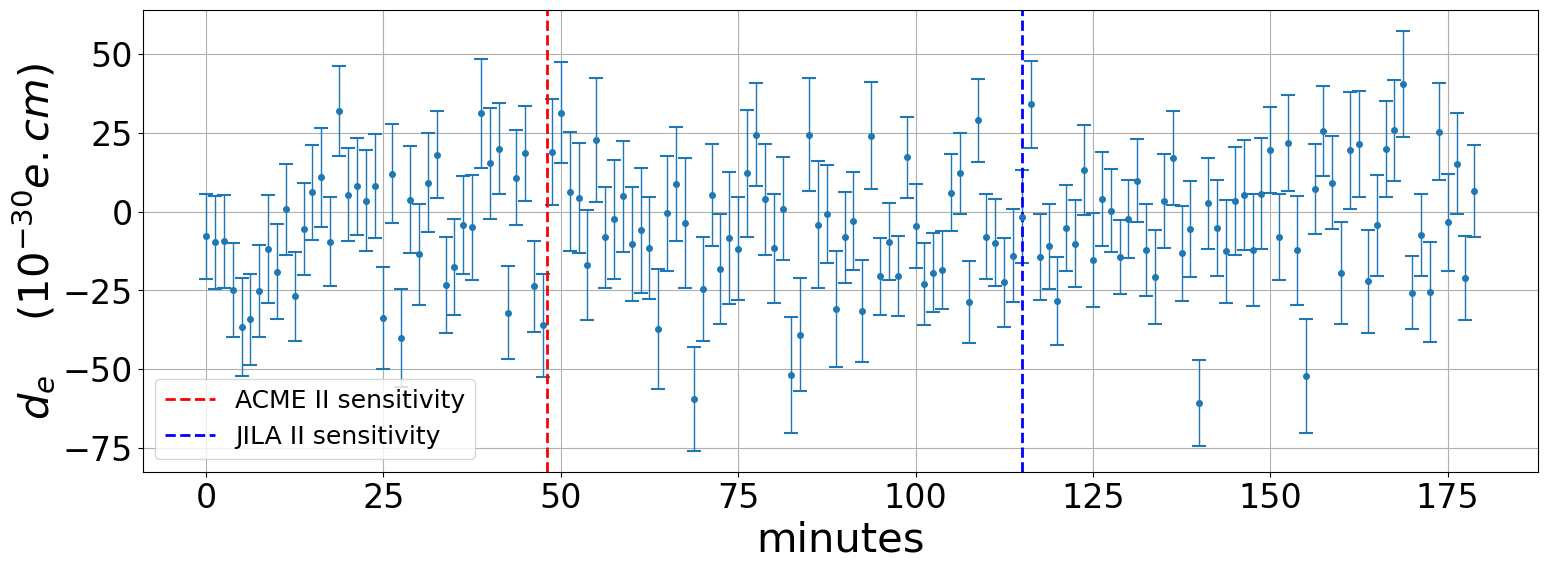

In [36]:
fig, ax = plt.subplots(figsize=(18, 6))  # 5. Longer plot horizontally

ax.errorbar(
    df["Dflat"]/8*10,
    df["omega_NE"] * 1e6 /373 * 3.1,
    yerr=df["uncertainty_omega_NE"] * 1e6 /373 * 3.1,
    fmt='o',
    markersize=4,            # 4. Smaller middle dot size
    capsize=5,               # 3. Horizontal caps on error bars
    capthick=1.5,            # Optional: make caps slightly thicker
    elinewidth=1             # Optional: thinner vertical error line
)

# vertical line at x = 48min
ax.axvline(x=48, color='red', linestyle='--', linewidth=2, label = 'ACME II sensitivity')  # 7. Vertical line at 48 minutes

# vertical line at x = 115min
ax.axvline(x=115, color='blue', linestyle='--', linewidth=2, label = 'JILA II sensitivity')  # 8. Vertical line at 115 minutes

ax.grid(True)                # 1. Grid on

ax.tick_params(axis='both', labelsize=24)  # 2. Larger tick font size
ax.set_ylabel(r"$d_{e} \ \ \ \  (10^{-30} e.cm)$", fontsize=30)  # 6. Larger y-axis label
ax.set_xlabel(r"minutes", fontsize = 30)

ax.legend(fontsize=18, loc = 'lower left')  # 5. Legend with larger font size

plt.show()

In [9]:
weighted_mean = np.average(df["omega_NE"], weights=1/df['uncertainty_omega_NE']**2)
red_chi_2 = np.sum(((df["omega_NE"] - weighted_mean) / df['uncertainty_omega_NE'])**2) / (len(df) - 1)

In [13]:
np.sqrt(1/np.sum(1/df['uncertainty_omega_NE'] ** 2))

0.00015231085446373513